# MPC Test

In [1]:
%matplotlib widget

In [2]:
from NMPC_Net.simulation import simulation
import numpy as np
from NMPC_Net.controller import pyomo_controller
from functools import partial
from NMPC_Net.controller.MPC import MPC, MPCParams
from NMPC_Net.dataset.dataset import Dataset
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.ion()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
### SIM EXAMPLE (10 Hz)
dataset = Dataset()
initial = dataset._get_rand_x0()
final = dataset._get_rand_xf(initial)

In [4]:
print(f"Initial: {initial.T[0,:]}")
print(f"Final: {final.T[0,:]}")
params = MPCParams()
params.H = 10 # seconds
controller = MPC(params=params)
sim = simulation.Simulation(initial, final, 10.0, controller, stop_r=1.0)
sim.run_simulation(20.0)

Initial: [ 0.          0.         31.45112707  0.        ]
Final: [64.57692982 26.7768982   1.54547148  0.80060718]
0: Sim time: 0.0/20.0                        Wall Time: 0:00:00.000005
1: Sim time: 0.1/20.0                        Wall Time: 0:00:01.043528
2: Sim time: 0.2/20.0                        Wall Time: 0:00:01.192941
3: Sim time: 0.30000000000000004/20.0                        Wall Time: 0:00:01.294021
4: Sim time: 0.4/20.0                        Wall Time: 0:00:01.472242
5: Sim time: 0.5/20.0                        Wall Time: 0:00:01.582757
6: Sim time: 0.6/20.0                        Wall Time: 0:00:01.680946
7: Sim time: 0.7/20.0                        Wall Time: 0:00:01.796115
8: Sim time: 0.7999999999999999/20.0                        Wall Time: 0:00:02.009754
9: Sim time: 0.8999999999999999/20.0                        Wall Time: 0:00:02.153837
10: Sim time: 0.9999999999999999/20.0                        Wall Time: 0:00:02.248925
11: Sim time: 1.0999999999999999/20.0    

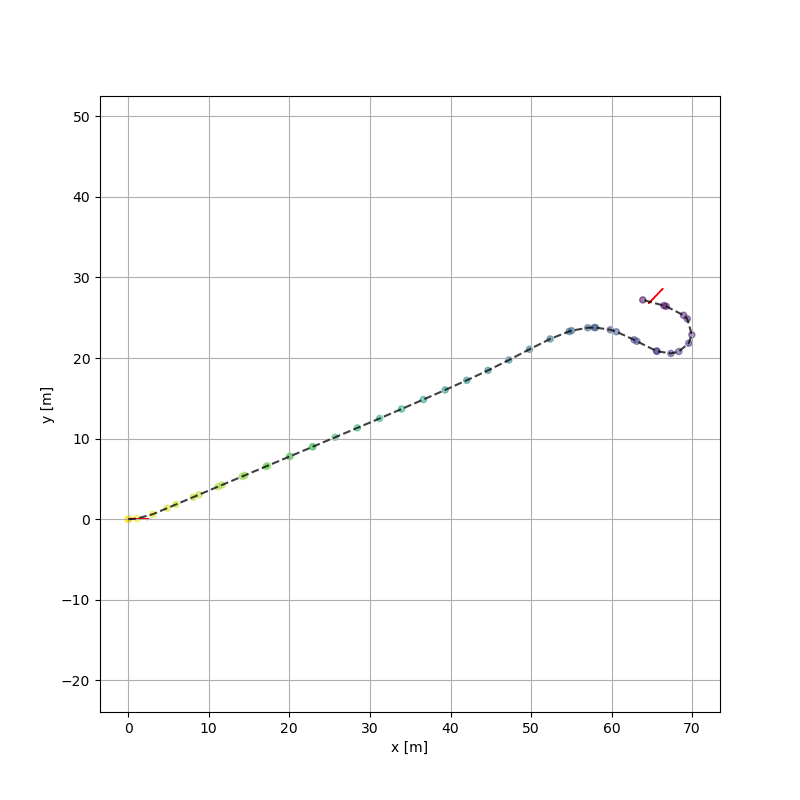

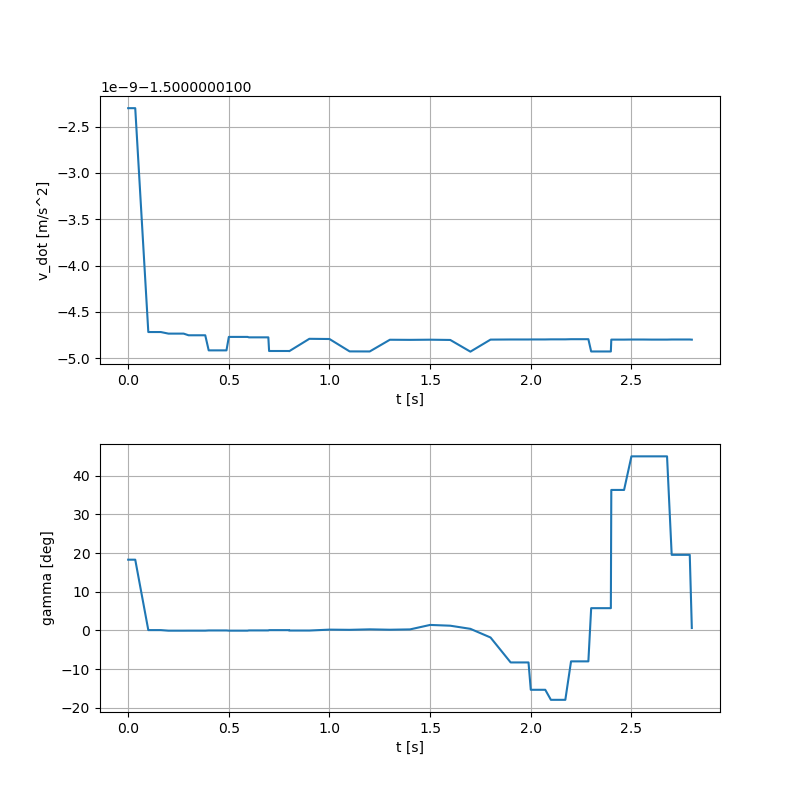

In [5]:
simulation.plot_path(sim)
simulation.plot_input(sim)